<a href="https://colab.research.google.com/github/akhil-maker/Deep-Learning/blob/master/NumpyNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's build a simple feedforward neural network from scratch using NumPy and walk through each step together. We'll create a network with:

1 input layer

1 hidden layer

1 output layer

This network will learn to classify points in a binary dataset (like XOR or linearly separable data).

In [ ]:
import numpy as np

Setup: Import and Create Data

In [ ]:
#Simple binary classification data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #data
Y = np.array([[0], [1], [1], [0]]) #label

Initialize parameters

In [ ]:
#set seed for reproducibility
np.random.seed(42)

# Network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Weights and Biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

Activation Functions

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1-x)

Forward Pass

In [ ]:
def forward(x):
  z1 = np.dot(X, W1) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

Backpropagation

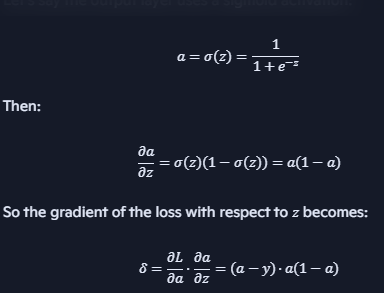

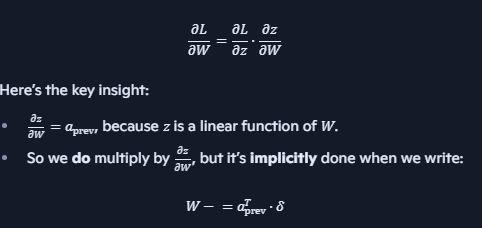

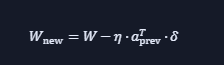




In [ ]:
def backward(X, y, z1, a1, z2, a2, lr):
  global W2, b2, W1, b1
  error = a2 - y
  d_a2 = error * sigmoid_derivative(a2)

  error_hidden = d_a2.dot(W2.T)
  d_a1 = error_hidden * sigmoid_derivative(a1)

  W2 -= a1.T.dot(d_a2) * lr
  b2 -= np.sum(d_a2, axis=0, keepdims=True) * lr
  W1 -= X.T.dot(d_a1) * lr
  b1 -= np.sum(d_a1, axis=0, keepdims=True) * lr

Training Loop

In [ ]:
epochs = 10000
lr = 0.1

for epoch in range(epochs):
  z1, a1, z2, a2 = forward(X)
  backward(X, Y, z1, a1, z2, a2, lr)
  if epoch % 1000 == 0:
    loss = np.mean((Y-a2)**2)
    print(f"Epoch: {epoch}, loss: {loss:.4f}")

Epoch: 0, loss: 0.2802
Epoch: 1000, loss: 0.2452
Epoch: 2000, loss: 0.2124
Epoch: 3000, loss: 0.1503
Epoch: 4000, loss: 0.0571
Epoch: 5000, loss: 0.0209
Epoch: 6000, loss: 0.0107
Epoch: 7000, loss: 0.0067
Epoch: 8000, loss: 0.0047
Epoch: 9000, loss: 0.0035


Final prediction

In [ ]:
_, _, _, output = forward(X)
print("Final pred:")
print(output)

Final pred:
[[0.03729475]
 [0.94915136]
 [0.94482103]
 [0.06423869]]
